##Principal component analysis PCA

In [1]:
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load the data

In [3]:

# Load data
data = pd.read_csv('/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_1_solar_radiation/Vienna_5_radiation.csv', delimiter= " ")
pd.set_option('display.max_columns', None)
#data = data.dropna(axis=0)



### Brief exploration

In the following, we will do some of the standard inspections one should do with every new dataset to get a feeling for its påroperties.

In [4]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OSM_id           1000 non-null   int64  
 1   Building_Height  1000 non-null   int64  
 2   Building_Volume  1000 non-null   float64
 3   Roof_Area        1000 non-null   float64
 4   Radiation        1000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [ ]:
#data_1 = data.dropna(inplace=True)

None


In [ ]:
#data=data.drop(['typicalFacadeGlazingRatio','groundFacadeGlazingRatio'], axis = 1)

In [5]:
# Print the first 5 rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OSM_id           1000 non-null   int64  
 1   Building_Height  1000 non-null   int64  
 2   Building_Volume  1000 non-null   float64
 3   Roof_Area        1000 non-null   float64
 4   Radiation        1000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [8]:
data=data.dropna()

In [9]:
# Descriptive statistics
data.describe()

OSM_id  Building_Height  Building_Volume  Roof_Area   Radiation
count       1000.000         1000.000         1000.000   1000.000    1000.000
mean   882346649.032            6.252         5383.921    143.056   59512.058
std    314787036.307            1.970        65794.255    533.064  226015.130
min        67624.000            6.000           33.829      3.388    1117.023
25%    955465291.750            6.000          467.748     51.019   18989.395
50%   1004642691.500            6.000          720.656     68.283   29042.605
75%   1009189096.250            6.000         1019.963     85.566   40212.837
max   1062532830.000           33.000      1786300.000   9380.114 3624700.000

In [ ]:
data.shape


(15807, 17)

In [12]:
#save a copy 

path2 ='/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_1_solar_radiation/Vienna_solar_columns.CSV'
data.to_csv(path2)

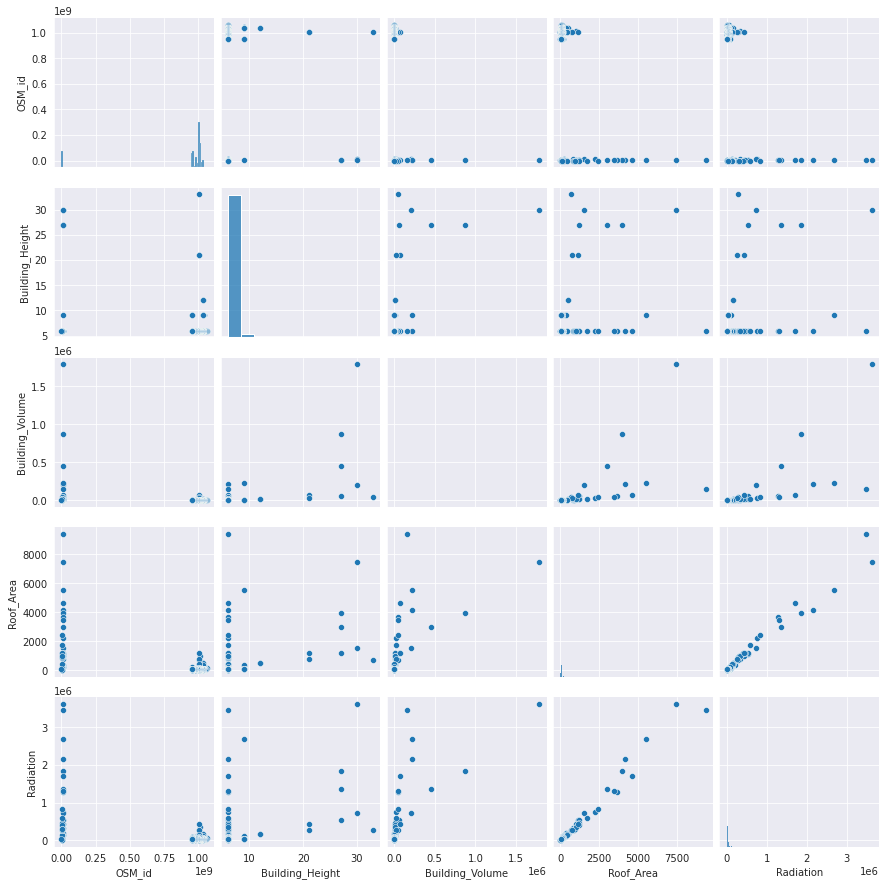

In [10]:
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(data, diag_kind="hist")

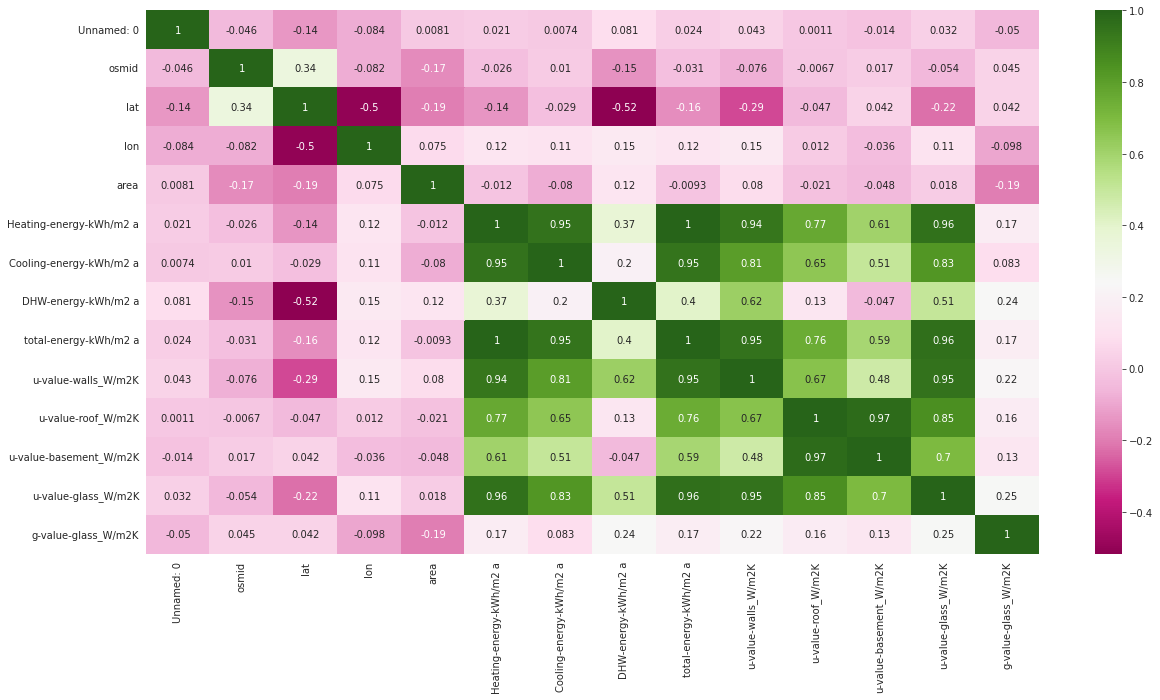

In [ ]:
# And lastly, a correlation plot
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="PiYG", ax=ax)

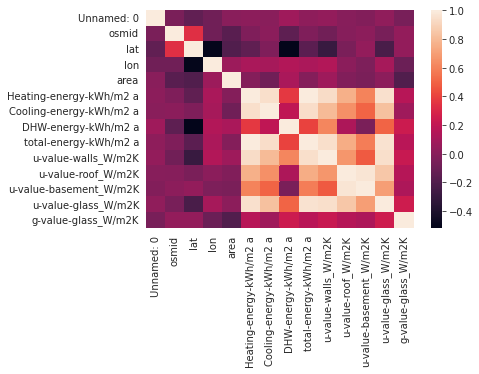

In [ ]:
# And lastly, a correlation plot
sns.heatmap(data.corr())

### Preprocessing

Since in PCA exercises the features used can be of different scale (eg. meter & kilometer) or dispolay a very different variance, it is common practice in ML workflow to normalize features. By doing so, we prevent features with high variance or scale ranges to dominate.

We here apply a standard scaler, where we substract for every feature its mean, and thyen divide by its standard deviation.

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

In [ ]:
data.columns

Index(['Unnamed: 0', 'building', 'area', 'Heating-energy-kWh/m2 a',
       'Cooling-energy-kWh/m2 a', 'DHW-energy-kWh/m2 a',
       'total-energy-kWh/m2 a', 'u-value-walls_W/m2K', 'u-value-roof_W/m2K',
       'u-value-basement_W/m2K', 'u-value-glass_W/m2K', 'g-value-glass_W/m2K',
       'geometry'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#data=data.drop(['typicalFacadeGlazingRatio','groundFacadeGlazingRatio'], axis = 1)

data1=data.drop(['geometry', 'building'], axis=1)

In [ ]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
#data_num = data.drop(columns = 'species')
data_num = data1

In [ ]:
type(data1)

pandas.core.frame.DataFrame

In [ ]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

In [ ]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=data_num.columns).describe()

Unnamed: 0      area  Heating-energy-kWh/m2 a  Cooling-energy-kWh/m2 a  \
count   15807.000 15807.000                15807.000                15807.000   
mean       -0.000     0.000                   -0.000                   -0.000   
std         1.000     1.000                    1.000                    1.000   
min        -2.056    -0.393                   -1.695                   -1.837   
25%        -0.677    -0.291                   -1.536                   -1.371   
50%        -0.094    -0.234                    0.279                    0.178   
75%         0.960    -0.063                    0.960                    1.111   
max         1.745    26.269                    1.519                    1.111   

       DHW-energy-kWh/m2 a  total-energy-kWh/m2 a  u-value-walls_W/m2K  \
count            15807.000              15807.000            15807.000   
mean                 0.000                  0.000                0.000   
std                  1.000                  1.000                1.000   
min                 -3.192                 -1.835               -2.123   
25%                 -0.695                 -1.534               -1.465   
50%                 -0.645                  0.234                0.008   
75%                  0.356                  0.970                0.853   
max                  2.458                  1.338                4.285   

       u-value-roof_W/m2K  u-value-basement_W/m2K  u-value-glass_W/m2K  \
count           15807.000               15807.000            15807.000   
mean                0.000                   0.000                0.000   
std                 1.000                   1.000                1.000   
min                -1.612                  -1.356               -2.469   
25%                -1.464                  -1.256               -1.584   
50%                 0.174                  -0.080                0.454   
75%                 1.225                   1.461                0.693   
max                 1.225                   1.461                1.053   

       g-value-glass_W/m2K  
count            15807.000  
mean                 0.000  
std                  1.000  
min                -10.282  
25%                  0.095  
50%                  0.095  
75%                  0.095  
max                  0.825

### Executing PCA

In [ ]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [ ]:
# Fit the model
model.fit(data_scaled)

PCA()

In [ ]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)
data_num_reduced_df = pd.DataFrame(data_reduced)
#data_num_reduced_df["species"] = data["species"]

print(data_num_reduced_df)

          0     1      2      3      4      5      6      7      8      9   \
0     -0.883 1.967  0.168  2.592  0.689 -1.407 -0.047 -0.016  0.006 -0.000   
1     -1.852 0.649  0.923  2.605 -0.143  0.909 -0.185 -0.005 -0.015 -0.000   
2     -1.856 0.335  0.186  2.230 -0.701  0.520 -0.103 -0.004 -0.009 -0.000   
3     -1.856 0.307  0.120  2.196 -0.751  0.485 -0.096 -0.004 -0.008 -0.000   
4     -1.857 0.228 -0.068  2.099 -0.894  0.386 -0.075 -0.004 -0.007 -0.000   
...      ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
15802 -2.804 3.714  5.531  1.927  4.356  3.875  3.329  0.429 -0.010 -0.000   
15803 -2.814 3.000  3.822  0.937  3.067  2.974  3.521  0.430  0.004 -0.000   
15804 -2.818 2.806  3.354  0.648  2.716  2.728  3.574  0.430  0.008 -0.000   
15805 -2.837 1.476  0.185 -1.137  0.324  1.058  3.929  0.433  0.034 -0.000   
15806 -2.773 6.597 12.198  4.792  9.433  7.398  2.600  0.425 -0.063 -0.000   

          10  
0      0.000  
1      0.000  
2      0.000  
3  

### Inspecting Results

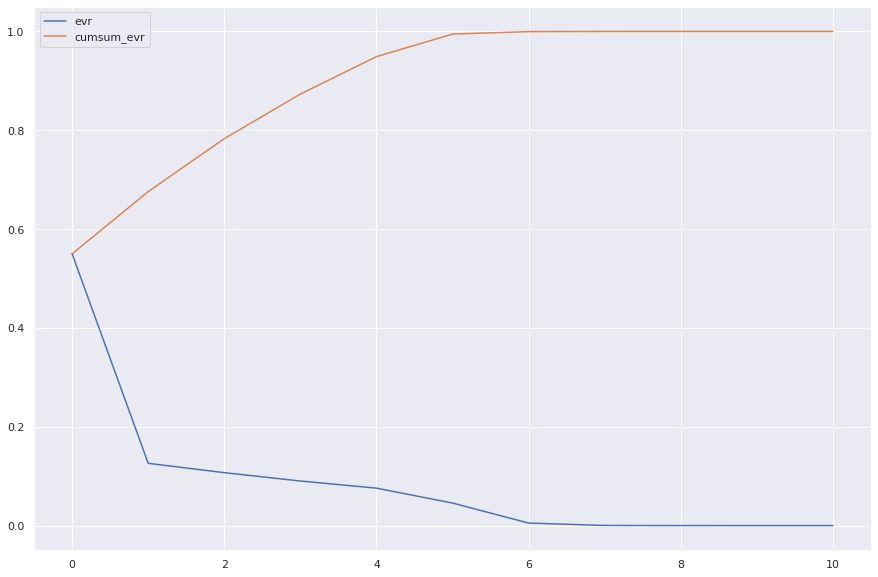

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
print(model.explained_variance_ratio_)

[6.24987243e-01 3.09542764e-01 2.15334940e-02 1.40071308e-02
 1.06296824e-02 9.31338797e-03 5.10723377e-03 3.07426305e-03
 1.03506328e-03 6.91758441e-04 3.94480920e-05 2.00422050e-05
 8.27080377e-06 5.59476979e-06 4.62308587e-06]


PLOTTING ALL THE PCS

In [ ]:
def myplot_df(df,coeff, scale, labels = None):
    df["xs"] = df[df.columns[0]]
    df["ys"] = df[df.columns[1]]
    #print(df)
    
    n = coeff.shape[0]
    
    
    if scale == True:
        scalex = 1.0/(df["xs"].max() - df["xs"].min())
        scaley = 1.0/(df["ys"].max() - df["ys"].min())

        df["xs"] = scalex *  df["xs"] 
        df["ys"] = scaley * df["ys"] 
    
    g = sns.scatterplot(x='xs',y='ys', data=df)
    g.legend(title = "PCA", loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon = False)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data_num.columns[i], color = 'black', ha = 'center', va = 'center', alpha = 0.9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')

No handles with labels found to put in legend.


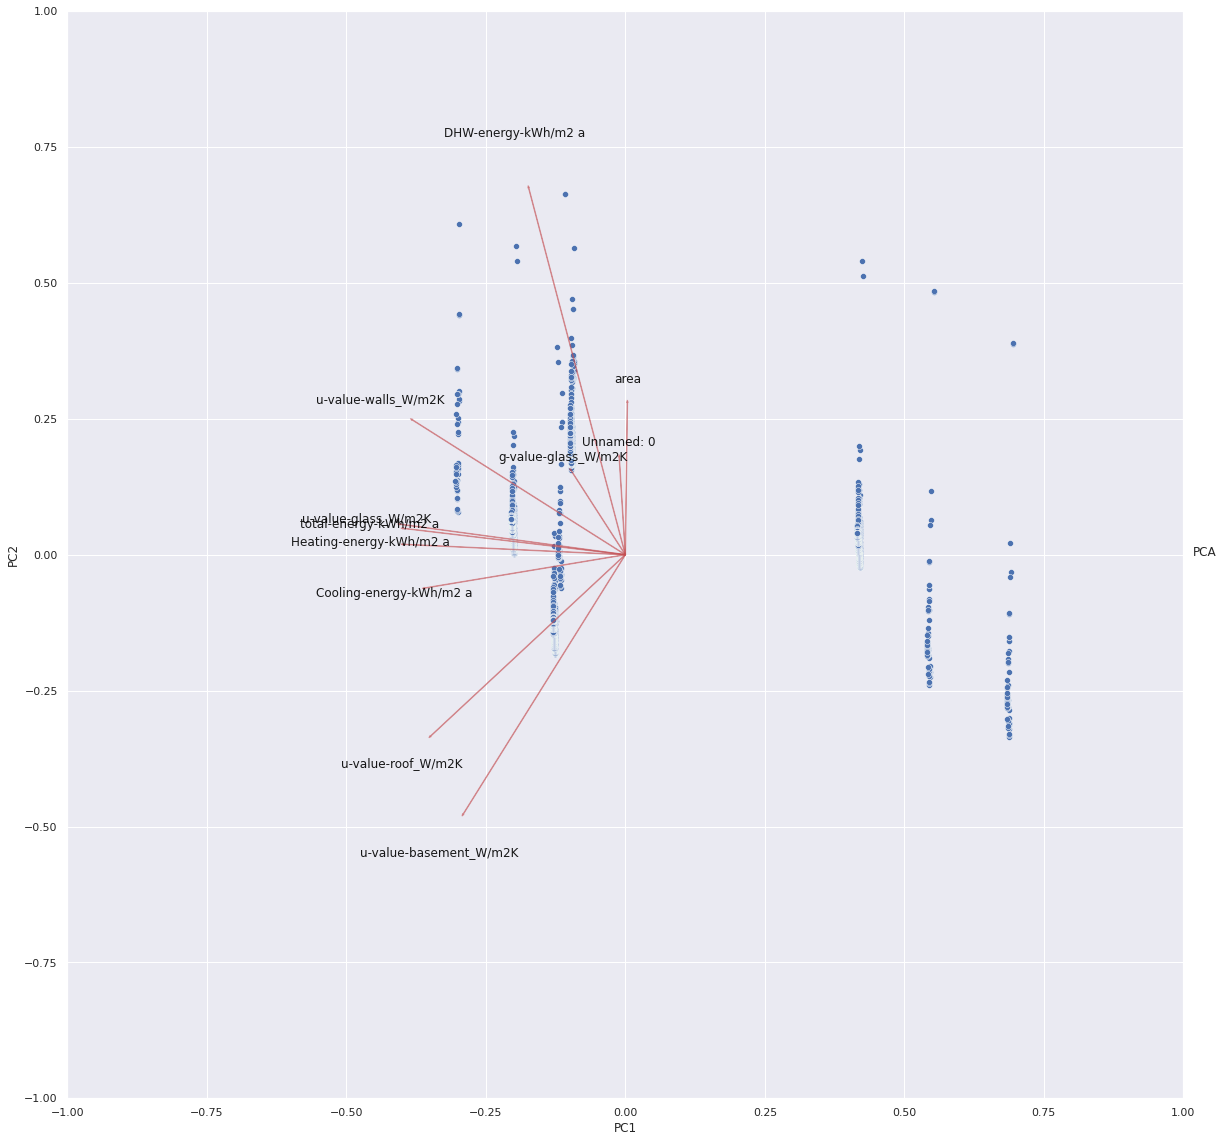

In [ ]:
# biplot graph
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
fig = plt.gcf()

fig.set_size_inches(20, 20)
myplot_df(data_num_reduced_df, np.transpose(model.components_[0:2, :]), True)


The important features are the ones that influence more the components and thus, have a large absolute value/score on the component.

In [ ]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data_num.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

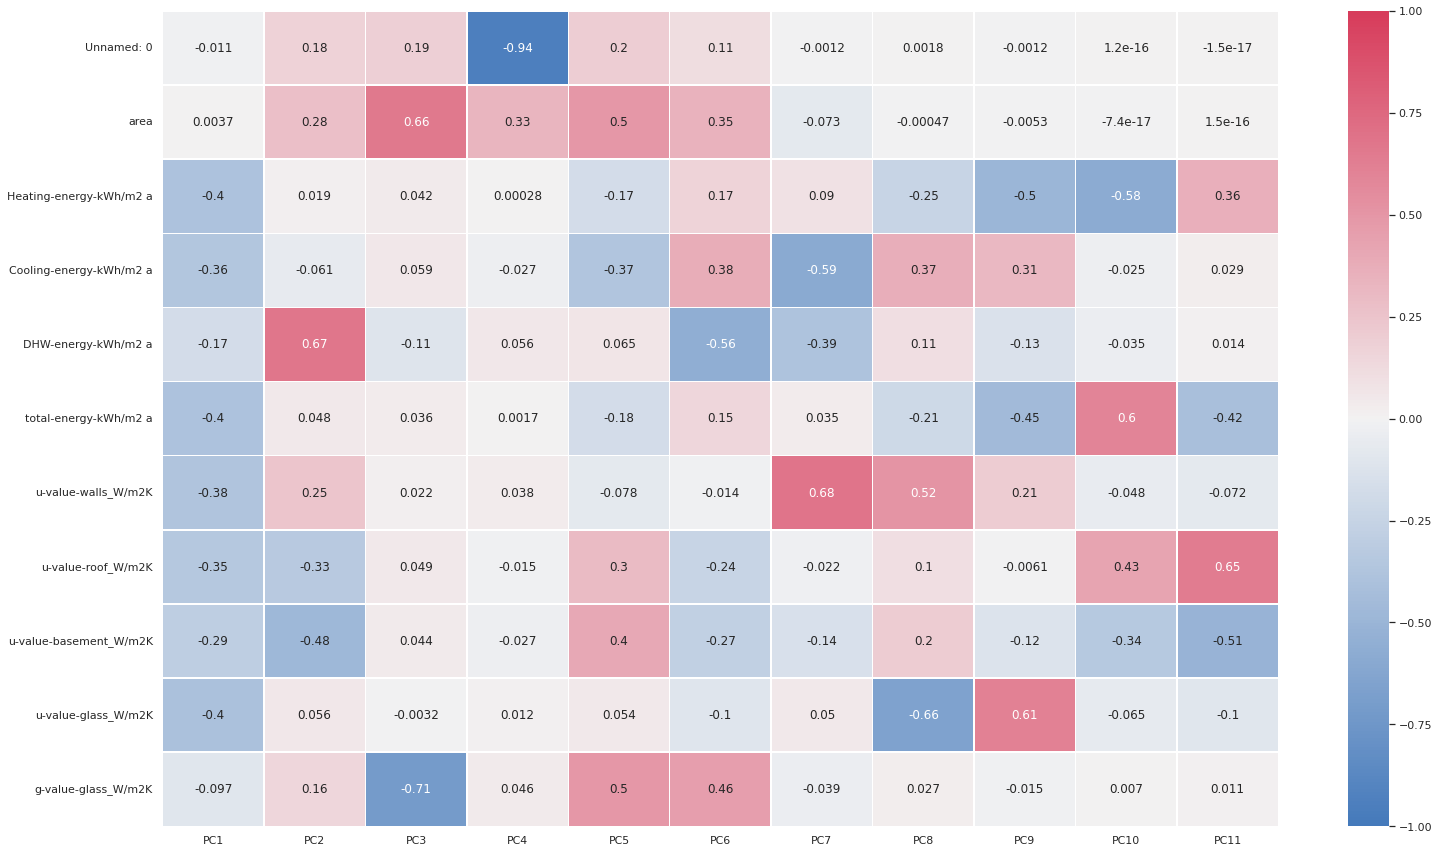

In [ ]:
#cmap="viridis"
#cmap="crest"
#cmap="mako"
#cmap=pal
pal = sns.diverging_palette(250, 5, as_cmap=True)
fig, ax = plt.subplots(figsize=(25,15))
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, cmap=pal, vmin=-1, vmax=1, annot=True)

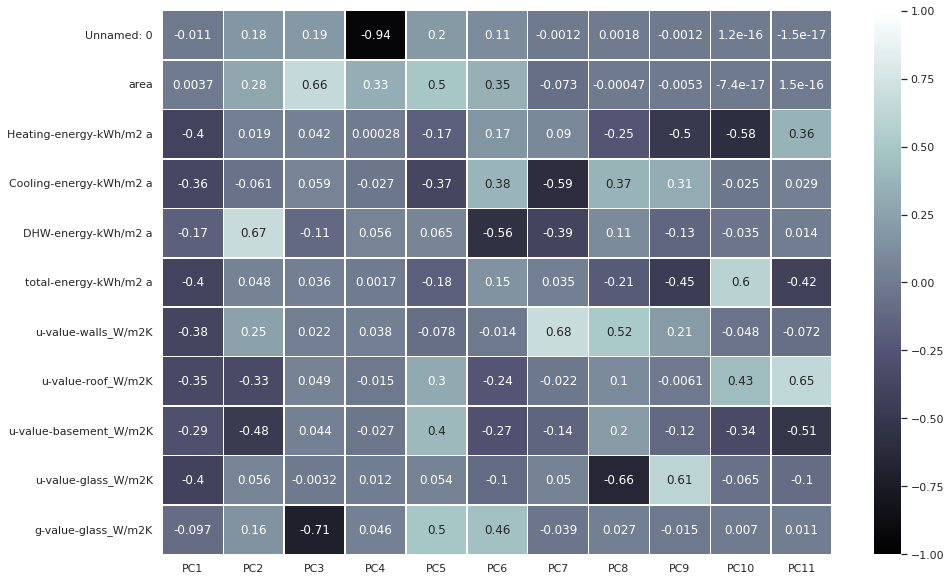

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [ ]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data_num.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

       0                      1
0    PC0    u-value-glass_W/m2K
1    PC1    DHW-energy-kWh/m2 a
2    PC2    g-value-glass_W/m2K
3    PC3             Unnamed: 0
4    PC4                   area
5    PC5    DHW-energy-kWh/m2 a
6    PC6    u-value-walls_W/m2K
7    PC7    u-value-glass_W/m2K
8    PC8    u-value-glass_W/m2K
9    PC9  total-energy-kWh/m2 a
10  PC10     u-value-roof_W/m2K
